In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from skimage.io import imread, imshow
from skimage.transform import resize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.models import load_model
from google.colab import drive
import pathlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_path = '/content/drive/MyDrive/Five Dataset'
data_dir = pathlib.Path(data_path)

In [5]:
images_dict = {
    'Eczema':list(data_dir.glob('Eczema/*.*')), #1201
    'Melanoma':list(data_dir.glob('Melanoma/*.*')), #1343
    'Acne': list(data_dir.glob('Acne/*.*')), #1189
    'Basal Cell Carcinoma': list(data_dir.glob('Basal Cell Carcinoma/*.*')), #1210
    'Benign Keratosis': list(data_dir.glob('Benign Keratosis/*.*')) #1268
}

label = {
    'Eczema':0,
    'Melanoma':1,
    'Acne':2,
    'Basal Cell Carcinoma':3,
    'Benign Keratosis':4
}

classes = ['Eczema','Melanoma','Acne','Basal Cell Carcinoma','Benign Keratosis']

In [7]:
len(images_dict["Melanoma"])

1343

Text(0.5, 1.0, '1')

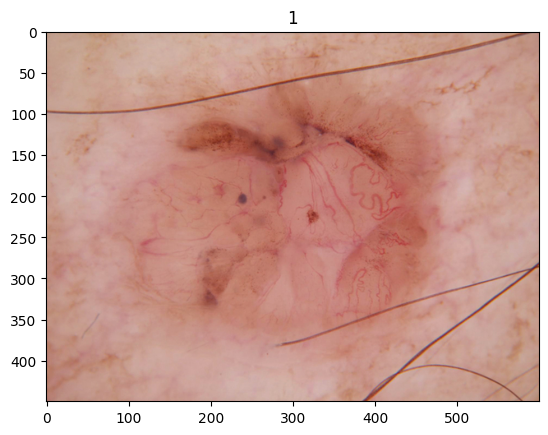

In [8]:
img=cv2.imread(str(images_dict['Basal Cell Carcinoma'][1010]))
cv2.resize(img,(256,256))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(label['Melanoma'])

In [9]:
X, Y = [], []

for image_name, images_path in images_dict.items(): #one disease = multiple images
    for image in images_path:
        img = cv2.imread(str(image))
        img = cv2.resize(img,(124,124))
        img=img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        X.append(img)
        Y.append(label[image_name])

In [10]:
len(X), len(Y)

(6211, 6211)

In [11]:
X = np.array(X)
Y = np.array(Y)

In [12]:
X.shape

(6211, 124, 124, 3)

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
X_train.shape[1:]

(124, 124, 3)

In [15]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization, Activation
num_classes=5

model = Sequential()

# Block-1

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(124,124,3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(124,124,3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-2

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-3

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# # Block-4

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-5

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-6

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-7

model.add(Dense(5,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      896       
                                                                 
 activation (Activation)     (None, 124, 124, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 124, 124, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 124, 124, 32)      0         
                                                                 
 batch_normalization_1 (Bat  (None, 124, 124, 32)      128       
 chNormalization)                                       

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler,Callback
checkpoint_callback = ModelCheckpoint('/content/drive/MyDrive/My fyp/Best_Model2.h5',
                                       monitor='val_accuracy',
                                       save_best_only=True,
                                       mode='max',
                                       verbose=1)

In [18]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test),callbacks=[checkpoint_callback])

Epoch 1/100
156/156 [==============================] - ETA: 0s - loss: 1.2427 - accuracy: 0.5352
Epoch 1: val_accuracy improved from -inf to 0.31295, saving model to /content/drive/MyDrive/My fyp/Best_Model2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


156/156 [==============================] - 37s 119ms/step - loss: 1.2427 - accuracy: 0.5352 - val_loss: 3.6600 - val_accuracy: 0.3130
Epoch 2/100
155/156 [============================>.] - ETA: 0s - loss: 0.9088 - accuracy: 0.6365
Epoch 2: val_accuracy improved from 0.31295 to 0.63315, saving model to /content/drive/MyDrive/My fyp/Best_Model2.h5
156/156 [==============================] - 15s 99ms/step - loss: 0.9084 - accuracy: 0.6367 - val_loss: 0.8490 - val_accuracy: 0.6331
Epoch 3/100
155/156 [============================>.] - ETA: 0s - loss: 0.7308 - accuracy: 0.6915
Epoch 3: val_accuracy improved from 0.63315 to 0.72486, saving model to /content/drive/MyDrive/My fyp/Best_Model2.h5
156/156 [==============================] - 15s 97ms/step - loss: 0.7307 - accuracy: 0.6914 - val_loss: 0.6550 - val_accuracy: 0.7249
Epoch 4/100
155/156 [============================>.] - ETA: 0s - loss: 0.6323 - accuracy: 0.7333
Epoch 4: val_accuracy improved from 0.72486 to 0.74175, saving model to /co

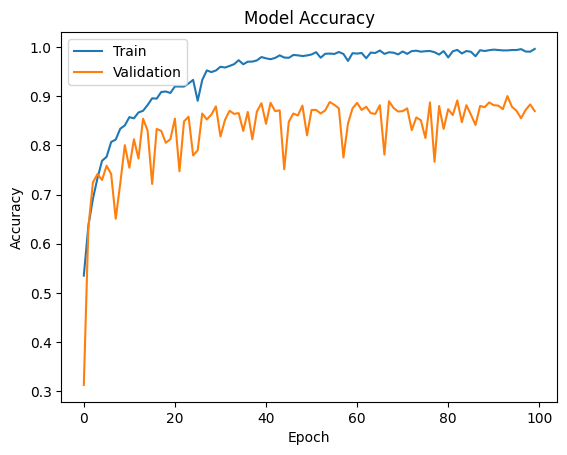

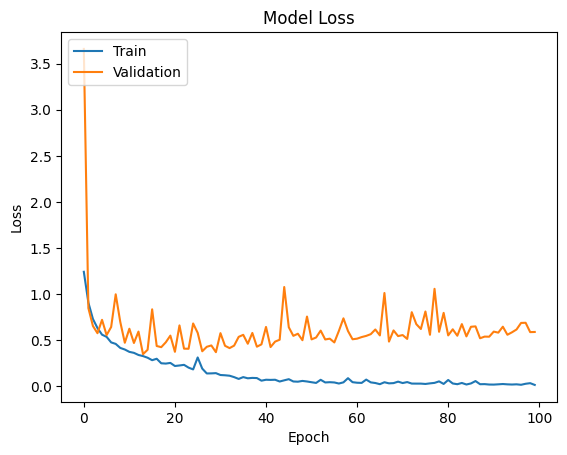

In [19]:
# Assuming you have a `history` object with recorded metrics
# history = model.fit(...)

# Plot training and validation accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


39/39 [==============================] - 1s 21ms/step
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       261
           1       0.99      0.99      0.99       269
           2       0.87      0.90      0.88       223
           3       0.75      0.84      0.79       233
           4       0.82      0.76      0.79       257

    accuracy                           0.87      1243
   macro avg       0.87      0.87      0.87      1243
weighted avg       0.87      0.87      0.87      1243



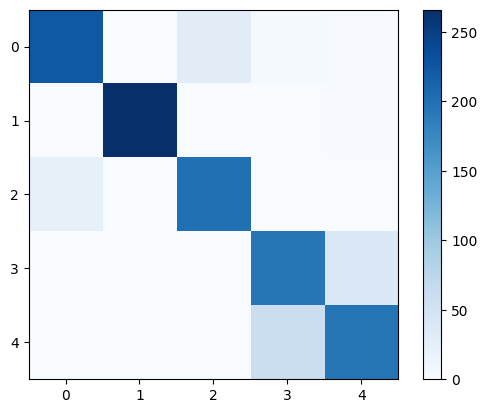

In [20]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
print(classification_report(y_test, y_pred_classes))

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
#plt.xticks(np.arange(len(set(labels))), set(labels), rotation=45)
#plt.yticks


<Axes: >

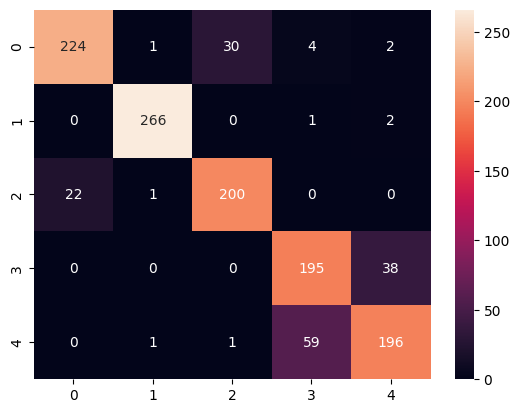

In [21]:
import seaborn as sns
sns.heatmap(cm,annot=True, fmt="g")

In [22]:
from tensorflow.keras import models

In [23]:
model_path = '/content/drive/MyDrive/My fyp/Best_Model2.h5'
model_loaded = models.load_model(model_path)

In [24]:
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      896       
                                                                 
 activation (Activation)     (None, 124, 124, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 124, 124, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 124, 124, 32)      0         
                                                                 
 batch_normalization_1 (Bat  (None, 124, 124, 32)      128       
 chNormalization)                                       

Saving bcl 2.jpg to bcl 2.jpg


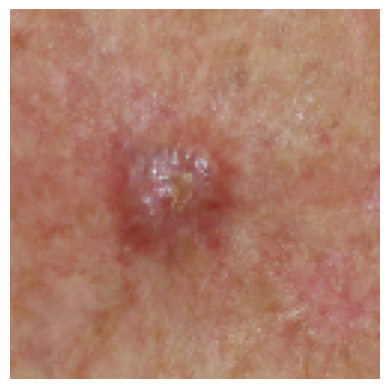

1/1 [==============================] - 0s 22ms/step
Predicted class: Basal Cell Carcinoma


In [28]:
# Upload the image file
uploaded = files.upload()

# Read and resize the uploaded image
image_path = next(iter(uploaded))
image = cv2.imread(image_path)
resized_image = cv2.resize(image, (124, 124))

# Display the resized image
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Preprocess the image for the model
preprocessed_image = resized_image.astype('float32') / 255.0
preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

# Load and predict using your model
prediction = model_loaded.predict(preprocessed_image)
predicted_class = np.argmax(prediction)

classes = ['Eczema','Melanoma','Acne','Basal Cell Carcinoma','Benign Keratosis']

# Print the predicted class
print("Predicted class:", classes[predicted_class])

Pre-Trained Models

VGG-16 Model

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


# re-size all the images to this
IMAGE_SIZE = [124,124]

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False


# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(6, activation='softmax')(x)


# create a model object
model = Model(inputs=vgg.input, outputs=prediction)



# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# view the structure of the model
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 124, 124, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 124, 124, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 124, 124, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 62, 62, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 62, 62, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 62, 62, 128)       147584    
                                                              

In [ ]:
# fit the model (50 Epochs)
r = model.fit(
  X_train,y_train,
  validation_data=(X_test,y_test),
  epochs=50
)

Epoch 1/50
156/156 [==============================] - 21s 72ms/step - loss: 0.7718 - accuracy: 0.7001 - val_loss: 0.5804 - val_accuracy: 0.7739
Epoch 2/50
156/156 [==============================] - 8s 51ms/step - loss: 0.5232 - accuracy: 0.7959 - val_loss: 0.5072 - val_accuracy: 0.7892
Epoch 3/50
156/156 [==============================] - 8s 52ms/step - loss: 0.4434 - accuracy: 0.8291 - val_loss: 0.4726 - val_accuracy: 0.8069
Epoch 4/50
156/156 [==============================] - 8s 51ms/step - loss: 0.4052 - accuracy: 0.8390 - val_loss: 0.4775 - val_accuracy: 0.7844
Epoch 5/50
156/156 [==============================] - 9s 59ms/step - loss: 0.3657 - accuracy: 0.8615 - val_loss: 0.4272 - val_accuracy: 0.8206
Epoch 6/50
156/156 [==============================] - 9s 58ms/step - loss: 0.3366 - accuracy: 0.8774 - val_loss: 0.4433 - val_accuracy: 0.8021
Epoch 7/50
156/156 [==============================] - 8s 53ms/step - loss: 0.3229 - accuracy: 0.8816 - val_loss: 0.4370 - val_accuracy: 0.814

In [ ]:
model.save("/content/drive/MyDrive/Models/fyp2 model/vgg16.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


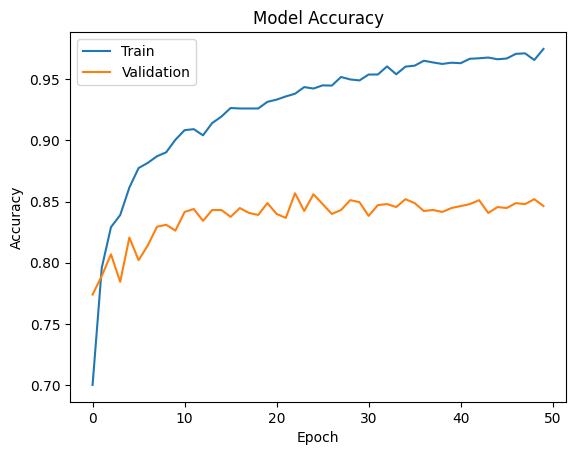

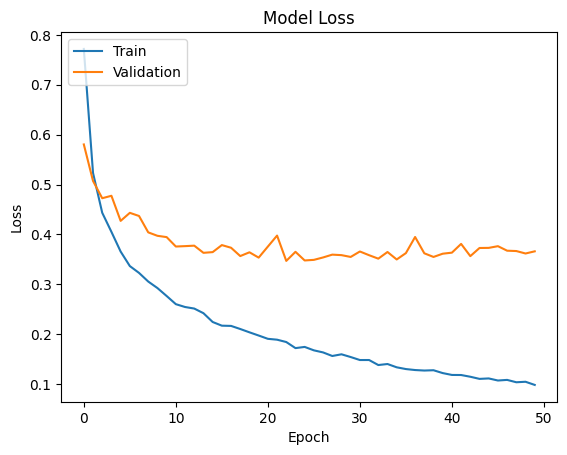

In [ ]:
# Assuming you have a `history` object with recorded metrics
# history = model.fit(...)

# Plot training and validation accuracy curves
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss curves
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Inception-V3

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


# re-size all the images to this
IMAGE_SIZE = [124,124]

# add preprocessing layer to the front of VGG
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in inception.layers:
  layer.trainable = False


# our layers - you can add more if you want
x = Flatten()(inception.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(6, activation='softmax')(x)


# create a model object
model = Model(inputs=inception.input, outputs=prediction)



# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


# view the structure of the model
model.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 124, 124, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 61, 61, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 61, 61, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)   

In [ ]:
# fit the model (40 Epochs)
r = model.fit(
  X_train,y_train,
  validation_data=(X_test,y_test),
  epochs=50
)

Epoch 1/50
156/156 [==============================] - 16s 62ms/step - loss: 1.1925 - accuracy: 0.7132 - val_loss: 0.8669 - val_accuracy: 0.7603
Epoch 2/50
156/156 [==============================] - 6s 37ms/step - loss: 0.6812 - accuracy: 0.8033 - val_loss: 1.0382 - val_accuracy: 0.7578
Epoch 3/50
156/156 [==============================] - 6s 38ms/step - loss: 0.5248 - accuracy: 0.8462 - val_loss: 1.1368 - val_accuracy: 0.7506
Epoch 4/50
156/156 [==============================] - 6s 39ms/step - loss: 0.4702 - accuracy: 0.8587 - val_loss: 0.8002 - val_accuracy: 0.7973
Epoch 5/50
156/156 [==============================] - 6s 37ms/step - loss: 0.3586 - accuracy: 0.8919 - val_loss: 0.8713 - val_accuracy: 0.7940
Epoch 6/50
156/156 [==============================] - 6s 39ms/step - loss: 0.2401 - accuracy: 0.9171 - val_loss: 0.8111 - val_accuracy: 0.8238
Epoch 7/50
156/156 [==============================] - 6s 38ms/step - loss: 0.2161 - accuracy: 0.9205 - val_loss: 0.8433 - val_accuracy: 0.816

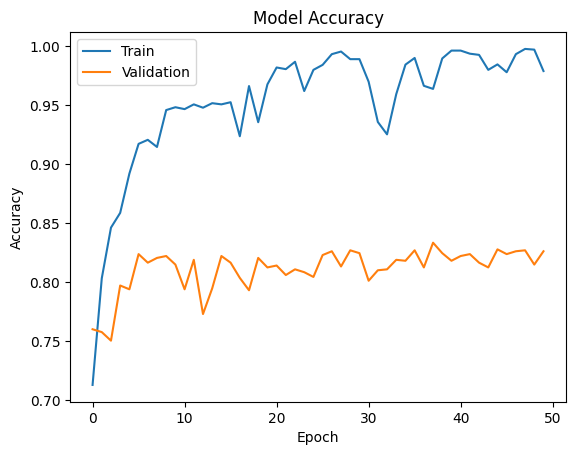

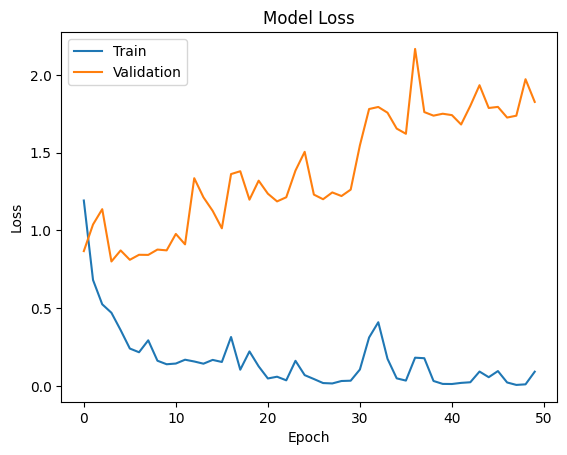

In [ ]:
# Assuming you have a `history` object with recorded metrics
# history = model.fit(...)

# Plot training and validation accuracy curves
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss curves
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/Models/fyp2 model/inceptionV3.h5")